In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data.csv
./events.csv
./Shayma Report.docx
./Twitter Mixed.ipynb
./.ipynb_checkpoints\Twitter Mixed-checkpoint.ipynb


In [2]:
data = pd.read_csv('data.csv').drop(columns = ['event ID', 'date'])
data.head(5)

,total keywords,total tweets,keywords,type
0,5,1124,harassment;sexual;mayor;filner;san,crime
1,2,5209,panda;birth,nature
2,4,13287,francisco;mayor;emergency;san,politics
3,2,8307,anniversary;50th,news
4,2,12488,wildfire;yosemite,nature


In [3]:
data.shape

(250, 4)

<AxesSubplot:>

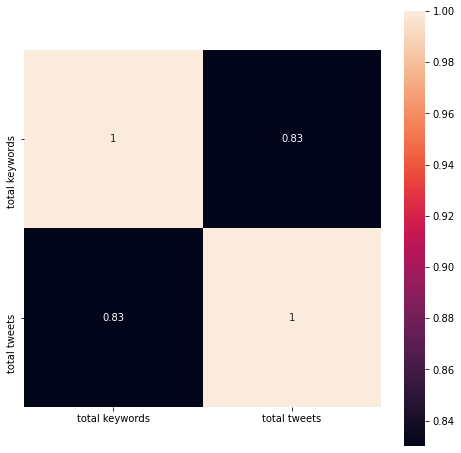

In [4]:
plt.subplots(figsize = (8, 8))
sns.heatmap(data.corr(), annot = True, square = True)

In [5]:
data.drop_duplicates(inplace = True)

In [6]:
data.isnull().sum()

total keywords    0
total tweets      0
keywords          0
type              0
dtype: int64

In [7]:
data.describe()

,total keywords,total tweets
count,250.000000,250.000000
mean,3.340000,16847.580000
std,3.957657,40816.904288
min,2.000000,1003.000000
25%,2.000000,2113.250000
50%,2.000000,3985.500000
75%,3.000000,9984.500000
max,32.000000,423756.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   total keywords  250 non-null    int64 
 1   total tweets    250 non-null    int64 
 2   keywords        250 non-null    object
 3   type            250 non-null    object
dtypes: int64(2), object(2)
memory usage: 9.8+ KB


Text(0.5, 0.98, 'Total Tweets for each Keyword Subset')

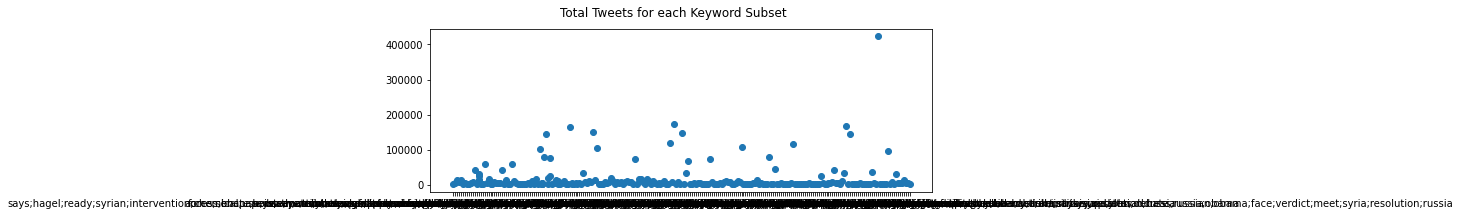

In [9]:
fig, axs = plt.subplots(figsize=(9, 3), sharey=True)
axs.scatter(data.keywords, data['total tweets'])
fig.suptitle('Total Tweets for each Keyword Subset')

In [10]:
test_num_col = data.select_dtypes(include = np.number).columns
print("Numerical Columns :\n", test_num_col)
test_cat_col = data.select_dtypes(exclude = np.number).columns
print("Categorical Columns :\n", test_cat_col)

Numerical Columns :
 Index(['total keywords', 'total tweets'], dtype='object')
Categorical Columns :
 Index(['keywords', 'type'], dtype='object')


In [11]:
le = LabelEncoder()

In [12]:
data['keywords'] = le.fit_transform(data['keywords'])
data['type'] = le.fit_transform(data['type'])

In [13]:
X = data.drop('type', axis = 1)
y = data['type']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [15]:
svc = svm.SVC(kernel = 'linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [16]:
y_pred = svc.predict(X_test)

In [17]:
print(confusion_matrix(y_test, y_pred))

[[2 0 0 0 4 0 0 0 0 2]
 [2 0 0 0 1 0 0 0 0 2]
 [0 0 0 0 2 1 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0]
 [6 3 0 0 4 0 0 0 0 2]
 [8 1 1 0 3 2 0 0 0 5]
 [3 0 0 0 2 0 0 0 0 2]
 [2 0 0 0 0 1 0 0 0 2]
 [2 1 0 0 0 0 0 0 0 0]
 [3 0 0 0 1 1 0 0 0 2]]


In [18]:
print(classification_report(y_test, y_pred, zero_division = 1))

              precision    recall  f1-score   support

           0       0.07      0.25      0.11         8
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         4
           5       1.00      0.00      0.00         1
           6       0.22      0.27      0.24        15
           7       0.40      0.10      0.16        20
           8       1.00      0.00      0.00         7
           9       1.00      0.00      0.00         5
          11       1.00      0.00      0.00         3
          12       0.11      0.29      0.16         7

    accuracy                           0.13        75
   macro avg       0.48      0.09      0.07        75
weighted avg       0.38      0.13      0.12        75



In [19]:
mlp = MLPClassifier(random_state=1, max_iter=300)

In [20]:
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=1)

In [22]:
y_pred = mlp.predict(X_test)

In [23]:
print(confusion_matrix(y_test, y_pred))

[[ 0  0  0  2  0  0  0  0  0  0  6]
 [ 0  0  0  0  0  0  0  0  0  0  5]
 [ 0  0  0  0  0  0  0  0  0  0  4]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  0 15]
 [ 0  0  0  0  0  1  0  0  0  0 19]
 [ 0  0  0  0  0  0  0  0  0  0  7]
 [ 0  0  0  0  0  0  0  0  0  0  5]
 [ 0  0  0  0  0  0  0  0  0  0  3]
 [ 0  0  0  0  0  0  0  0  0  0  7]]


In [24]:
print(classification_report(y_test, y_pred, zero_division = 1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         8
           1       1.00      0.00      0.00         5
           2       1.00      0.00      0.00         4
           4       0.00      1.00      0.00         0
           5       1.00      0.00      0.00         1
           6       0.00      0.00      0.00        15
           7       1.00      0.00      0.00        20
           8       1.00      0.00      0.00         7
           9       1.00      0.00      0.00         5
          11       1.00      0.00      0.00         3
          12       0.10      1.00      0.18         7

    accuracy                           0.09        75
   macro avg       0.74      0.18      0.02        75
weighted avg       0.72      0.09      0.02        75

